# Hacktiv 8 FTDS

## i. Perkenalan



GC2 : 

*   Nama : Iqbal Awis N.
*   Batch: RMT-19

Latar Belakang Permasalahan : 
saya adalah anggota tim Data Science di Austin Smart City dan sedang mengerjakan projek analisa sistem pembuangan dan pengelolaan sampah di kota tersebut. Sebagai anggota team, berdasarkan data yang tersedia, saya akan menganalisa menggunakan statistika deskriptif dan inferensial, serta memberikan insight kepada pemerintah Austin mengenai kondisi sistem pembuangan dan pengelolaan sampah.

Problem statement : 

memberikan insight pada pemerintah kota terkait pembuangan dan pengelolaan sampah di kota Austin










## ii. Import Pustaka yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats  import ttest_1samp


**import pandas as pd** ini perintah untuk meload library pandas

---

**import matplotlib.pyplot as plt** perintah ini untuk meload library matplotlib untuk melakukan visualisasi

## iii. Data loading

### SQL Query

SELECT report_date, load_time, load_type, load_weight, dropoff_site
FROM `bigquery-public-data.austin_waste.waste_and_diversion`
WHERE report_date >= '2021-01-01' AND report_date <= '2021-07-09'



Perintah tersebut akan memanggil tabel `waste_and_diversion` pada database `austin_waste`




### Meload dataset

In [2]:
df=pd.read_csv('h8dsft_P0GC2_iqbal_awis.csv')

perintah tsb akan meload dataset h8dsft_P0GC2_iqbal_awis

In [3]:
#Menampilkan dataset
df

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-07-08,2021-07-08 12:00:00.000000 UTC,TIRES,2260.0,MRF
1,2021-07-08,2021-07-08 11:00:00.000000 UTC,TIRES,1260.0,MRF
2,2021-07-08,2021-07-08 03:00:00.000000 UTC,TIRES,800.0,MRF
3,2021-05-01,2021-05-01 12:29:00.000000 UTC,TIRES,760.0,MRF
4,2021-07-03,2021-07-03 12:09:00.000000 UTC,TIRES,1400.0,MRF
...,...,...,...,...,...
26152,2021-03-01,2021-03-01 11:26:00.000000 UTC,ORGANICS,12100.0,ORGANICS BY GOSH
26153,2021-03-01,2021-03-01 04:27:00.000000 UTC,ORGANICS,10900.0,ORGANICS BY GOSH
26154,2021-03-01,2021-03-01 05:55:00.000000 UTC,ORGANICS,21800.0,ORGANICS BY GOSH
26155,2021-03-01,2021-03-02 01:10:00.000000 UTC,ORGANICS,5640.0,ORGANICS BY GOSH


Menampilkan seluruh dataset

* report_date = tanggal
* load_time = jam 
* load_type = type loading
* load_weight = berat loading
* dropoff_site= lokasi pembuangan

In [4]:
#menampilkan data
df.head()

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-07-08,2021-07-08 12:00:00.000000 UTC,TIRES,2260.0,MRF
1,2021-07-08,2021-07-08 11:00:00.000000 UTC,TIRES,1260.0,MRF
2,2021-07-08,2021-07-08 03:00:00.000000 UTC,TIRES,800.0,MRF
3,2021-05-01,2021-05-01 12:29:00.000000 UTC,TIRES,760.0,MRF
4,2021-07-03,2021-07-03 12:09:00.000000 UTC,TIRES,1400.0,MRF


Menampilkan 5 data teratas

In [5]:
df.tail()

,report_date,load_time,load_type,load_weight,dropoff_site
26152,2021-03-01,2021-03-01 11:26:00.000000 UTC,ORGANICS,12100.0,ORGANICS BY GOSH
26153,2021-03-01,2021-03-01 04:27:00.000000 UTC,ORGANICS,10900.0,ORGANICS BY GOSH
26154,2021-03-01,2021-03-01 05:55:00.000000 UTC,ORGANICS,21800.0,ORGANICS BY GOSH
26155,2021-03-01,2021-03-02 01:10:00.000000 UTC,ORGANICS,5640.0,ORGANICS BY GOSH
26156,2021-03-01,2021-03-01 10:22:00.000000 UTC,RECYCLED METAL,360.0,AUSTIN IRON AND METAL


menampilkan data 5 terbawah

In [6]:
#.shape
df.shape

(26157, 5)

dataset terdiri dari 26.157 baris dan 5 kolom

In [7]:
df.describe()

,load_weight
count,25109.000000
mean,12227.136307
std,7135.059565
min,0.000000
25%,7060.000000
50%,11300.000000
75%,16380.000000
max,245540.000000


# iv. Data Cleaning

# Problem 1

## 1. Melakukan Perhitungan dan analisa statistik, dan pembersihan data

## Pemeriksaan Data

In [8]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26157 entries, 0 to 26156
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   report_date   26157 non-null  object 
 1   load_time     26157 non-null  object 
 2   load_type     26157 non-null  object 
 3   load_weight   25109 non-null  float64
 4   dropoff_site  26157 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1021.9+ KB


Menampilkan Info dataset untuk melihat typedata
bisa dilihat 4 kolom pada dataset memiliki type data'object' dan 1 tipe data 'float' 

## Mengubah Typedata

In [9]:
# ubah tipe data kolom report_date dan load_time menjadi datetime
df['report_date'] = pd.to_datetime(df['report_date']) 
df['load_time'] = pd.to_datetime(df['load_time']) 
# Periksa data yang sudah diubah df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26157 entries, 0 to 26156
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   report_date   26157 non-null  datetime64[ns]     
 1   load_time     26157 non-null  datetime64[ns, UTC]
 2   load_type     26157 non-null  object             
 3   load_weight   25109 non-null  float64            
 4   dropoff_site  26157 non-null  object             
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(1), object(2)
memory usage: 1021.9+ KB


kolom `report_date` dan `load_time` telah berhasil diubah menjadi type data **date_time**

## Mencheck Distribusi Normal

In [10]:
# Periksa skewness dan kurtosis 
print(' skewness ' + str(df['load_weight'].skew()))
print(' kurtosis ' + str(df['load_weight'].kurt()))

 skewness 3.335938213321684
 kurtosis 84.19097541413653


dilihat bahwa skewness pada data `load_weight` sebesar 3.4, jika nilai  >0.5 maka distibusi data tsb tidak normal. apabila <0.5 didapat bilang bahwa distribusi data tsb normal 

## Missing value

In [11]:
#cek missing value
df.isnull().sum()

report_date        0
load_time          0
load_type          0
load_weight     1048
dropoff_site       0
dtype: int64

terdapat missing value sebanyak 1.048 pada kolom `load_weight`

In [12]:
#mencari median
median_load_weight = df['load_weight'].median()
df['load_weight'].fillna(median_load_weight, inplace=True)

karena distibusi pada data `load_weight` tidak normal maka kita dapat mengisi missing value dengan median dari data tsb 

In [13]:
#cek missing value
df.isnull().sum()

report_date     0
load_time       0
load_type       0
load_weight     0
dropoff_site    0
dtype: int64

dataset sudah bersih dari missing value dan berhasil mengisi data missing value tsb dengan median dari data

## Data Eksplorasi

## 2. Melihat Rentang waktu, Tipe Load Sampah dan Tempat pembuangan sampah 

## Rentang waktu

In [14]:
#melihat nilai terendah 
df['report_date'].min()

Timestamp('2021-01-01 00:00:00')

bisa kita lihat data pertama diambil pada 01-01-2021

In [15]:
#melihat nilai tertinggi
df['report_date'].max()

Timestamp('2021-07-09 00:00:00')

data terakhir diambil pada 09-07-2021

bisa disimpulkan bahwa rentang waktu pengambilan data adalah : 01-01-2021 sampai 09-07-2021

## Tipe Load sampah

In [16]:
#melihat kolom `load_type`
tipe_load=df['load_type'].unique()
df_load_type = pd.DataFrame(tipe_load, columns=['load_type'])
print(df_load_type)

                    load_type
0                       TIRES
1   RECYCLING - SINGLE STREAM
2                    SWEEPING
3                       BRUSH
4         GARBAGE COLLECTIONS
5               YARD TRIMMING
6                        BULK
7                    ORGANICS
8                 DEAD ANIMAL
9                MIXED LITTER
10                     LITTER
11             RECYCLED METAL
12     CONTAMINATED RECYCLING
13      CONTAMINATED ORGANICS


dari data tsb dapat dilihat bahwa terdapat 14 tipe load sampah di kota Austin

## Tempat pembuangan sampah

In [17]:
#mencari data dropoff_site
data_drop_site=df['dropoff_site'].unique()
data_drop=pd.DataFrame(data_drop_site,columns=['dropoff_site'])
print(data_drop)

             dropoff_site
0                     MRF
1               TDS - MRF
2             ONION CREEK
3             PARK CENTER
4            HORNSBY BEND
5            TDS LANDFILL
6          GREAT NORTHERN
7        ORGANICS BY GOSH
8      BALCONES RECYCLING
9      ON ROUTE HIGH DUMP
10  AUSTIN IRON AND METAL
11              PARK BEND
12         BALCONES WOODS
13       STEINER LANDFILL
14              WESTFIELD
15            ST. EDWARDS
16  AUSTIN WOOD RECYCLING
17                 WILCAB


dengan demikian kita dapat mengetahui tempat mana saja yang menjadi tempat pembuangan sampah di wilayah Austin

## 3. Central Tendency Modus, Median dan Mean

### Modus

In [18]:
#mencari modus dari dropp_site
df['dropoff_site'].mode()

0    TDS LANDFILL
Name: dropoff_site, dtype: object

dapat kita simpulkan bahwa `TDS LANDFIELD` adalah tempat pembuangan paling dituju dari semua tempat pembuangan yang ada di Austin

### Mean

In [19]:
#melihat median data 
rata_rata = df.groupby('dropoff_site')['load_weight'].mean()
rata_rata_sorted = rata_rata.sort_values(ascending=False)
print(rata_rata_sorted)

dropoff_site
WESTFIELD                16020.000000
TDS LANDFILL             15168.321726
PARK BEND                13385.000000
GREAT NORTHERN           11973.142857
ORGANICS BY GOSH         11817.220851
ON ROUTE HIGH DUMP       11405.925926
ST. EDWARDS              11300.000000
PARK CENTER              11300.000000
WILCAB                   11300.000000
ONION CREEK              11300.000000
TDS - MRF                 9872.550882
BALCONES RECYCLING        9464.652072
BALCONES WOODS            8460.000000
HORNSBY BEND              6637.111782
AUSTIN WOOD RECYCLING     4050.000000
MRF                       1799.982143
STEINER LANDFILL           780.000000
AUSTIN IRON AND METAL      451.200000
Name: load_weight, dtype: float64


berdasarkan data tersebut dapat disimpulkan bahwa site `WESTFIELD` adalah site dengan rata-rata muatan terbesar di kota Austin

### Median

In [20]:
#mencari median
median_drop = df.groupby('dropoff_site')['load_weight'].median()
median_sorted = median_drop.sort_values(ascending=False)
print(median_sorted)

dropoff_site
WESTFIELD                16020.0
TDS LANDFILL             14920.0
PARK BEND                12330.0
ORGANICS BY GOSH         11900.0
ONION CREEK              11300.0
ST. EDWARDS              11300.0
PARK CENTER              11300.0
WILCAB                   11300.0
ON ROUTE HIGH DUMP       11300.0
GREAT NORTHERN           11300.0
TDS - MRF                10330.0
BALCONES RECYCLING        9840.0
BALCONES WOODS            8460.0
HORNSBY BEND              6400.0
AUSTIN WOOD RECYCLING     4050.0
MRF                       1360.0
STEINER LANDFILL           780.0
AUSTIN IRON AND METAL      400.0
Name: load_weight, dtype: float64


### 4. Pilih Site yang menarik

In [21]:
# menghitung jumlah kemunculan nilai pada kolom dropoff_site
count = df['dropoff_site'].value_counts()

# membuat tabel baru dengan jumlah kemunculan nilai pada kolom dropoff_site
df_count = pd.DataFrame({'dropoff_site': count.index, 'jumlah':count.values})

# menampilkan tabel baru
print(df_count)

             dropoff_site  jumlah
0            TDS LANDFILL   10694
1        ORGANICS BY GOSH    5755
2      BALCONES RECYCLING    3837
3               TDS - MRF    2948
4            HORNSBY BEND    1655
5             ONION CREEK     813
6                     MRF     168
7      ON ROUTE HIGH DUMP      81
8             PARK CENTER      75
9          GREAT NORTHERN      70
10  AUSTIN IRON AND METAL      50
11              PARK BEND       4
12  AUSTIN WOOD RECYCLING       2
13         BALCONES WOODS       1
14       STEINER LANDFILL       1
15              WESTFIELD       1
16            ST. EDWARDS       1
17                 WILCAB       1


`TDS LANDFILL` adalah dropoff_site yang paling banyak dipakai di kota Austin, Oleh karena itu kita akan memilih dropoff site tsb untuk kita lihat lebih jauh

## 5. Outlier

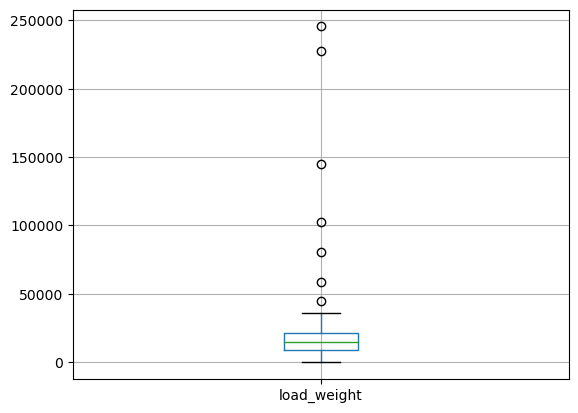

In [22]:
# Filter data hanya untuk nilai dropoff_site = "WESTFIELD"
tds_data = df[df['dropoff_site'] == 'TDS LANDFILL']

# Membuat boxplot untuk kolom load_weight pada data Westfield
tds_data.boxplot(column='load_weight')

# Menampilkan plot
plt.show()

## IQR (tukey rule)

menghitung outlier dengan teknik IQR (Tukey Rule) karena distirbusi tidak normal

In [23]:
q1= tds_data['load_weight'].quantile(0.25)
q3= tds_data['load_weight'].quantile(0.75)
q1,q3

(8820.0, 21660.0)

In [24]:
IQR= q3-q1
IQR

12840.0

In [25]:
upper_limit= q3 + 1.5*IQR
lower_limit=q1 - 1.5*IQR

print(upper_limit)
print(lower_limit)

40920.0
-10440.0


In [26]:
data_outlier_avg= tds_data[(tds_data['load_weight'] > upper_limit) | (tds_data['load_weight'] < lower_limit)]
data_outlier_avg.shape[0]

7

In [27]:
upper_limit= q3 + 3*IQR
lower_limit=q1 - 3*IQR

print(upper_limit)
print(lower_limit)

60180.0
-29700.0


In [28]:
data_outlier_avg= tds_data[(tds_data['load_weight'] > upper_limit) | (tds_data['load_weight'] < lower_limit)]
data_outlier_avg

,report_date,load_time,load_type,load_weight,dropoff_site
2381,2021-03-09,2021-03-09 01:30:00+00:00,GARBAGE COLLECTIONS,145160.0,TDS LANDFILL
13632,2021-05-26,2021-05-26 11:40:00+00:00,GARBAGE COLLECTIONS,80697.0,TDS LANDFILL
13817,2021-05-27,2021-05-27 11:33:00+00:00,GARBAGE COLLECTIONS,245540.0,TDS LANDFILL
16964,2021-06-21,2021-06-21 01:05:00+00:00,GARBAGE COLLECTIONS,227780.0,TDS LANDFILL
24239,2021-02-09,2021-02-09 01:08:00+00:00,GARBAGE COLLECTIONS,102680.0,TDS LANDFILL


In [29]:
#menampilkan data yang sudah tdk ada outlier 
clean_data=data_outlier_avg= tds_data[(tds_data['load_weight'] <= upper_limit) & (tds_data['load_weight'] >= lower_limit)]
clean_data.shape


(10689, 5)

Data sudah bersih dari **Outlier**

In [30]:
#perbandingan outlier dan tidak
with_outlier=tds_data['load_weight'].mean()
without_outlier=clean_data['load_weight'].mean()
print('Data masih ada Outlier     : ' , with_outlier)
print('Data sudah tdk ada Outlier : ', without_outlier)

Data masih ada Outlier     :  15168.321726145503
Data sudah tdk ada Outlier :  15100.39999433062


In [31]:
with_outlier_median=tds_data['load_weight'].median()
without_outlier_median=clean_data['load_weight'].median()
print('Data masih ada Outlier     : ' , with_outlier_median)
print('Data sudah tdk ada Outlier : ', without_outlier_median)

Data masih ada Outlier     :  14920.0
Data sudah tdk ada Outlier :  14920.0


In [32]:
#persentase_outlier = (jumlah_outlier / jumlah_data) * 100%
presentase_outlier=(5/10496)*100
presentase_outlier

0.04763719512195122

dapat dilihat bahwa presentasi jumlah **outlier** hanya sebesar 0.047 % dapat kita ambil kesimpulan bahwa data **outlier** tidak mempengaruhi data tersebut

## 6. Range, Variance, STD Devisiasi

### Range

In [33]:
#mencari range
range=clean_data['load_weight'].max() - clean_data['load_weight'].min() 
print('Range dari data tsb adalah : ', range)

Range dari data tsb adalah :  58600.0


### Variance

In [34]:
variance=clean_data['load_weight'].var()
print('Variance Data Tsb adalah : ', variance )

Variance Data Tsb adalah :  61925004.745981306


In [35]:
std=clean_data['load_weight'].std()
print('Standard Devisiasi Data tsb adalah : ', std)

Standard Devisiasi Data tsb adalah :  7869.244229656448


## 7. Confidence Interval

In [36]:

# Jumlah data
n = clean_data.shape[0]

# Hitung mean dan standar devaisi dari TDS LANDFILL
mean = clean_data['load_weight'].mean()
std = clean_data['load_weight'].std()

# Confidence level
confidence_level = 0.95

# Perhitungan confidence interval untuk site baru
lower_ci, upper_ci = stats.t.interval(confidence_level, n - 1, loc=mean, scale=std / n*0.5)

# Tampilkan hasil
print(f"Mean Load Weight: {mean:.2f}")
print(f"Confidence Interval ({confidence_level*100}%): [{lower_ci:.2f}, {upper_ci:.2f}]")

Mean Load Weight: 15100.40
Confidence Interval (95.0%): [15099.68, 15101.12]


Ada kemungkinan jika ada penambahan site baru, site tersebut akan menampung rata - rata weight sebanyak 15.099 - 15.101.

Note : Data yang diambil hanya dari site `TDS LANDFILL`

## 8. Analisa Uji Hipotesis 

untuk memeriksa apakah berat sampah berubah atau tidak, kami akan melakukan sampel tunggal single sampel hypothesis testing dan menetapkan signifikansi 0.05


Hypothesis :

* H0: μ =15100

* H1: μ != 15100

In [37]:
t_value,p_val = stats.ttest_1samp(clean_data.load_weight, 15100 )
print('P-value:',p_val)
print('t-statistics:',t_value)

P-value: 0.9958070734570458
t-statistics: 0.005255201225039987


P_value yang didapatkan sebesar = 0.995. karena p-value >0.05 kami gagal menolak h0 yang dapat disimpulkan ada tidak ada perubahan rata-rata dari populasi  

## Pertanyaan

1. Teknik apa yang kamu pilih untuk handling outlier? jelaskan alasannya!
    * IQR (tukey Rule) karena distribusi tidak normal, jika distribusi normal dapat dilakukan dengan metode Z-Score/STD

2. Apa konsep dibalik confidence interval sehingga kita dapat menggunakannya untuk menyelesaikan langkah pada nomor 7?
    * rentang nilai yang memberikan perkiraan kisaran untuk parameter populasi, seperti rata-rata atau proporsi, berdasarkan sampel data yang diambil secara acak. Konsep dasar di balik confidence interval adalah bahwa ketika kita mengambil sampel acak dari populasi, kita mungkin mendapatkan hasil yang sedikit berbeda dari hasil yang akan kita peroleh jika kita mengambil sampel lain

3. Jelaskan jenis uji hipotesis apa yang kamu terapkan dan mengapa?
    * `One Sample Two Tailed`.  Kami menggunakan metode ini karena kami hanya menguji variabel dan membandingkan sampel mean data load weight  dan populasi 

## Problem 2

Pada permasalahan yang sama, pemerintah ingin tau berapa banyak load sampah dalam kg di kota Austin di hari berikutnya (10 Juli 2021). Dalam hal ini, pemerintah menginginkan kamu melakukan forecasting untuk memprediksi nilai di masa depan

adapun rumus laju sampah sebagai berikut : 
<img src="https://latex2png.com/pngs/d095b902113a1ef68d07fd786e4be428.png"></img>

rumus prediksi : 
<img src="https://latex2png.com/pngs/50dc63299a1860b10a15346a9ca3a42e.png"></img>

In [38]:
weight_date = df[['report_date', 'load_weight']].groupby('report_date').sum().sort_index(ascending=True)
index_date = weight_date.reset_index(drop=True)
weight_date

,load_weight
report_date,
2021-01-01,45200.0
2021-01-02,2204030.0
2021-01-04,2920260.0
2021-01-05,2399840.0
2021-01-06,2453050.0
...,...
2021-07-05,1897290.0
2021-07-06,1989440.0
2021-07-07,1654780.0


In [39]:
# Fungsi kecepatan (velocity)
weight_date['velocity'] = weight_date['load_weight'].diff() / weight_date.index.to_series().diff().dt.days
# Perhitungan forecast
weight_date['forecast esok hari'] = weight_date['load_weight'] + weight_date['velocity'] * weight_date.index.to_series().diff().dt.days
weight_date

,load_weight,velocity,forecast esok hari
report_date,,,
2021-01-01,45200.0,NaN,NaN
2021-01-02,2204030.0,2158830.0,4362860.0
2021-01-04,2920260.0,358115.0,3636490.0
2021-01-05,2399840.0,-520420.0,1879420.0
2021-01-06,2453050.0,53210.0,2506260.0
...,...,...,...
2021-07-05,1897290.0,810625.0,3518540.0
2021-07-06,1989440.0,92150.0,2081590.0
2021-07-07,1654780.0,-334660.0,1320120.0


1. Untuk menghitung turunan pertama dapat digunakan metode simbolik dan numerik, untuk kasus ini, teknik apa yang kamu gunakan?
    * Untuk kasus tersebut saya menggunakan metode numerik


2. Apakah kamu membutuhkan fungsi matematis untuk menghitung turunannya? (ya/tidak) berikan alasanmu!
    * Tidak, karena tidak menggunakan metode simbolik

3. Berapa load weight yang kamu perkirakan di hari esok (10 Juli 2021)?
    * 1188270.0

## Kesimpulan/ Overall Analisis

* Dari dataset tersebut `TDS landfill` adalah dropoff_site yang paling banyak dipakai di kota Austin. Mungkin sekiranya kepada pemerintah untuk dapat mempertimbangkan jumlah petugas yang ada di dropp off site tersebut agar petugas tidak kewalahan dalam memproses sampah

* Prediksi loading sampanh ditanggal 10 Juli 2021 adalah sebesar -1188270.0